<a href="https://colab.research.google.com/github/WADOOD-UL-ISLAM/Dotnet-Repository/blob/main/object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers
!pip install gTTS

In [ ]:
!pip install pillow

In [ ]:
from transformers  import VisionEncoderDecoderModel , ViTFeatureExtractor , AutoTokenizer
import torch
from PIL import Image
import cv2
import gtts
import matplotlib.pyplot as plt
import IPython.display as ipd

In [ ]:
model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

In [ ]:
feature_extractor = ViTFeatureExtractor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

VisionEncoderDecoderModel(
  (encoder): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_featur

In [ ]:
max_length = 16
num_beams = 4

gen_kwargs = {"max_length": max_length , "num_beams": num_beams}

In [ ]:
def predict_step(image_paths):
  images = []
  for image_path in image_paths:
    i_image = Image.open(image_path)
    if i_image.mode != "RGB":
      i_image = i_image.convert(mode = "RGB")
    images.append(i_image)


  pixel_values = feature_extractor(images=images , return_tensors='pt').pixel_values
  pixel_values = pixel_values.to(device)

  output_ids = model.generate(pixel_values, **gen_kwargs)

  preds = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
  preds = [pred.strip() for pred in preds]
  return preds


In [ ]:
predict_step(['eagle.jpg'])


['a brown and white bird standing on top of a sandy beach']

In [ ]:
speaking = str(predict_step(['eagle.jpg']))
sound = gtts.gTTS(speaking , lang="en")
sound.save("sound.mp3")
(ipd.Audio("/content/sound.mp3"))

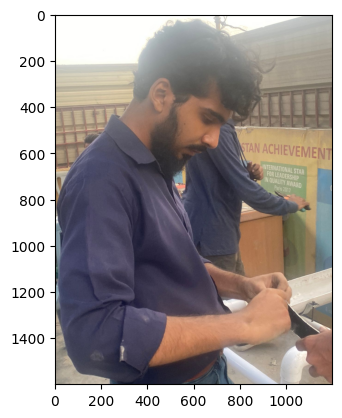

In [ ]:
img = cv2.imread('arslan.jpeg')
plt.imshow(cv2.cvtColor(img , cv2.COLOR_BGR2RGB))


In [ ]:
predict_step(['arslan.jpeg'])


['a man in a blue shirt is using a cell phone']

In [ ]:
speaking = str(predict_step(['arslan.jpeg']))
sound = gtts.gTTS(speaking , lang="en")
sound.save("sound.mp3")
(ipd.Audio("/content/sound.mp3"))

In [ ]:
def predict_video(video_path):
    video = cv2.VideoCapture(video_path)
    preds = []

    while True:
        ret, frame = video.read()
        if not ret:
            break

        i_image = Image.fromarray(frame)
        if i_image.mode != "RGB":
            i_image = i_image.convert(mode="RGB")

        pixel_values = feature_extractor(images=[i_image], return_tensors='pt').pixel_values
        pixel_values = pixel_values.to(device)

        output_ids = model.generate(pixel_values, **gen_kwargs)

        pred = tokenizer.decode(output_ids[0], skip_special_tokens=True).strip()
        preds.append(pred)

    video.release()
    return preds


In [ ]:
predict_video('detection.mp4')